# Load and Preprocess Data

In [124]:
import pandas as pd

# load dataset
df = pd.read_csv('Titanic-Dataset.csv')

df.info()

# Check for missing values
print(df.isnull().sum())

# Preprocessing the dataset
# Impute missing values for Age by median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for Embarked by mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Feature Engineering
# Create a new feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Drop SibSp and Parch columns
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Drop Cabin column and PassengerId
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

# remove Fare outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Fare'] >= lower_bound) & 
        (df['Fare'] <= upper_bound)]

# remove Age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & 
        (df['Age'] <= upper_bound)]

# Dropping unnecessary columns
X = df.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)
y = df['Survived']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_95812/2508074037.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_95812/2508074037.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

# Neural Network Training

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalizing the dataset
mean = X.mean()
std = X.std()
normalized_X = (X - mean) / std

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)



In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l1, l2

# Define the neural network architecture
def create_model(learning_rate=0.001, momentum=0.9, dropout_rate=0.2, num_layers=1, neurons_per_layer=4, regularizer_type='l1', regularization_param=0.01):
    model = Sequential()
    
    # Choose regularizer
    if regularizer_type == 'l1':

        regularizer = l1(regularization_param)
    elif regularizer_type == 'l2':
        regularizer = l2(regularization_param)
    else:
        regularizer = None
    
    # add input layer
    model.add(Input(shape=(X.shape[1],)))
    # add hidden layers
    for i in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    # add output layer
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    return model


# Hyper Parameter Tuning

In [127]:
grid_result = None

'''# Comment out to skip grid search
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Define parameter grid
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__momentum': [0.95, 0.99],
    'model__num_layers': [1, 2],
    'model__neurons_per_layer': [2, 3], 
    'model__regularizer_type': ['l1', 'l2'],
    'batch_size': [100, 200],
}

# Wrap your model with scikeras KerasRegressor
model = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0)

# Use tqdm for GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Train the model with grid search
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)
'''



'# Comment out to skip grid search\nfrom sklearn.model_selection import GridSearchCV\nfrom scikeras.wrappers import KerasRegressor\n\n# Define parameter grid\nparam_grid = {\n    \'model__learning_rate\': [0.001, 0.01, 0.1],\n    \'model__momentum\': [0.95, 0.99],\n    \'model__num_layers\': [1, 2],\n    \'model__neurons_per_layer\': [2, 3], \n    \'model__regularizer_type\': [\'l1\', \'l2\'],\n    \'batch_size\': [100, 200],\n}\n\n# Wrap your model with scikeras KerasRegressor\nmodel = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0)\n\n# Use tqdm for GridSearchCV\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=\'r2\')\n\n# Train the model with grid search\ngrid_result = grid.fit(X_train, y_train)\n\n# Print the best hyperparameters and accuracy\nprint("Best parameters: ", grid_result.best_params_)\nprint("Best score: ", grid_result.best_score_)\n'

# Visualize MSE

Best batch size: 200
Best learning rate: 0.1
Best momentum: 0.95
Best number of layers: 2
Best number of neurons per layer: 3
Best regularizer type: l2
Early stopping triggered at epoch 108


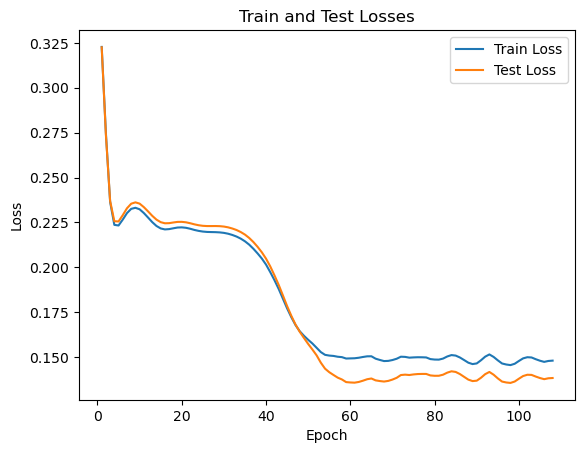

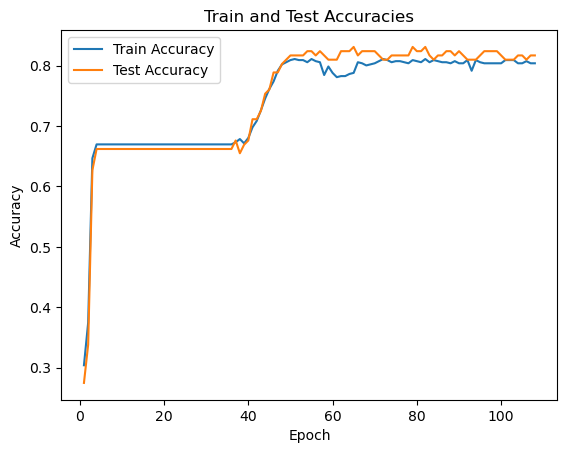

Train loss: 0.14808517925824521
Test loss: 0.13841065299062555
Train accuracy: 0.803886925795053
Test accuracy: 0.8169014084507042


In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasRegressor

# grab the best hyperparameters
if grid_result is None:
    best_batch_size = 200
    best_learning_rate = 0.1
    best_momentum = 0.95
    best_num_layers = 2
    best_neurons_per_layer = 3
    best_regularizer_type = 'l2'
else:
    best_batch_size = grid_result.best_params_['batch_size']
    best_learning_rate = grid_result.best_params_['model__learning_rate']
    best_momentum = grid_result.best_params_['model__momentum']
    best_num_layers = grid_result.best_params_['model__num_layers']
    best_neurons_per_layer = grid_result.best_params_['model__neurons_per_layer']
    best_regularizer_type = grid_result.best_params_['model__regularizer_type']

# Print the best hyperparameters
print(f"Best batch size: {best_batch_size}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best momentum: {best_momentum}")
print(f"Best number of layers: {best_num_layers}")
print(f"Best number of neurons per layer: {best_neurons_per_layer}")
print(f"Best regularizer type: {best_regularizer_type}")


# Create the best model
best_model = create_model(learning_rate=best_learning_rate, 
                          momentum=best_momentum, 
                          num_layers=best_num_layers, 
                          neurons_per_layer=best_neurons_per_layer,
                          regularizer_type=best_regularizer_type
                          )
model = KerasRegressor(model=best_model, epochs=200, batch_size=best_batch_size, verbose=0)

# store the train and test losses
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

patience = 10  # Number of epochs with little improvement after which training will be stopped
best_loss = float('inf')

# Train the model
for epoch in range(1, 200):
    model.partial_fit(X_train, y_train)
    
    # Calculate train loss
    train_loss = mean_squared_error(y_train, model.predict(X_train))
    train_losses.append(train_loss)
    
    # Calculate test loss
    test_loss = mean_squared_error(y_test, model.predict(X_test))
    test_losses.append(test_loss)
    
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train) > 0.5)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test) > 0.5)
    test_accuracies.append(test_accuracy)
    
    # Check to see if test loss has improved or not 
    if test_loss < best_loss + 0.0005:
        best_loss = test_loss
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1
    
    # Stop training if patience is exceeded
    if patience_counter >= patience and epoch > 100:
        print(f"Early stopping triggered at epoch {epoch}")
        break

# Plot train and test losses
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(np.arange(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.show()

# Plot train and test accuracies
plt.plot(np.arange(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(np.arange(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies')
plt.show()

print(f"Train loss: {train_losses[-1]}")
print(f"Test loss: {test_losses[-1]}")
print(f"Train accuracy: {train_accuracies[-1]}")
print(f"Test accuracy: {test_accuracies[-1]}")
